<a href="https://colab.research.google.com/github/vjaswanthvarma/numpy/blob/main/Company%20with%20regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv("Company_data.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

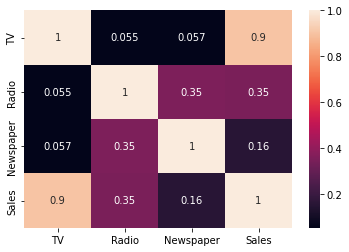

In [10]:
a=data.corr()
sns.heatmap(a,annot=True)
plt.show()

In [59]:
# Retrive the first column
x=data.iloc[:,0].values
x=np.array(x.reshape(-1,1))


In [61]:
# Retrive the last column
y=data.iloc[:,-1].values
y=np.array(y.reshape(-1,1))

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=0)

In [63]:
from sklearn.linear_model import LinearRegression
ireg=LinearRegression()

In [64]:
# training of data
ireg.fit(x_train,y_train)

LinearRegression()

In [ ]:
plt.scatter(x_train,y_train)
plt.show()

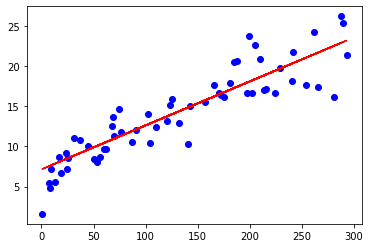

In [66]:
# Testing of data
y_pred=ireg.predict(x_test)
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,y_pred,color="red")
plt.show()


In [69]:
data.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [70]:
#Evaluate the testing data 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RQSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score",r2_score(y_test,y_pred))

MAE 1.8639438916550555
MSE 5.569539193467241
RQSE 2.3599871172248466
r2_score 0.8150168765722069


In [71]:
#Apply the Ridge Regularization
from sklearn.linear_model import Ridge
reg=Ridge(alpha=0.5)
reg.fit(x_train,y_train)

Ridge(alpha=0.5)

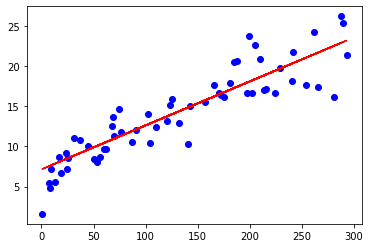

In [73]:
#predict the output after perform L2 regularization
ry_pred=reg.predict(x_test);
plt.scatter(x_test,y_test,color="blue");
plt.plot(x_test,ry_pred,color="red");
plt.show()

In [74]:
#Evaluate the model with testing data
print("MAE",mean_absolute_error(y_test,ry_pred))
print("MSE",mean_squared_error(y_test,ry_pred))
print("RSE",np.sqrt(mean_squared_error(y_test,ry_pred)))
print("r2_score",r2_score(y_test,ry_pred))


MAE 1.8639441346803625
MSE 5.569540264551759
RSE 2.35998734415076
r2_score 0.8150168409978887


In [75]:
# import lasso regularization
from sklearn.linear_model import Lasso
lreg=Lasso(alpha=0.5)
lreg.fit(x_train,y_train)


Lasso(alpha=0.5)

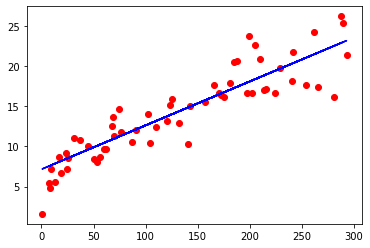

In [76]:
ly_pred=lreg.predict(x_test)
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,ly_pred,color="blue")
plt.show()

In [77]:
#Evaluate the model after testing the data
print("MAE",mean_absolute_error(y_test,ly_pred))
print("MSE",mean_squared_error(y_test,ly_pred))
print("RSE",np.sqrt(mean_squared_error(y_test,ly_pred)))
print("r2_score",r2_score(y_test,ly_pred))

MAE 1.864584320060547
MSE 5.572320142008376
RSE 2.360576230925063
r2_score 0.8149245119205972
